# prepare a prediction model for predicting Price of Toyota Car

 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('ToyotaCorolla.csv',encoding='Latin-1')

In [3]:
df

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [5]:
df.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [6]:
df.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.rename({"Age_08_04":'Age'},axis=1,inplace=True)

In [8]:
df.head(2)

,Id,Model,Price,Age,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0


In [9]:
# Extract Data

In [10]:
Toyota = df[["Price","Age","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
Toyota

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


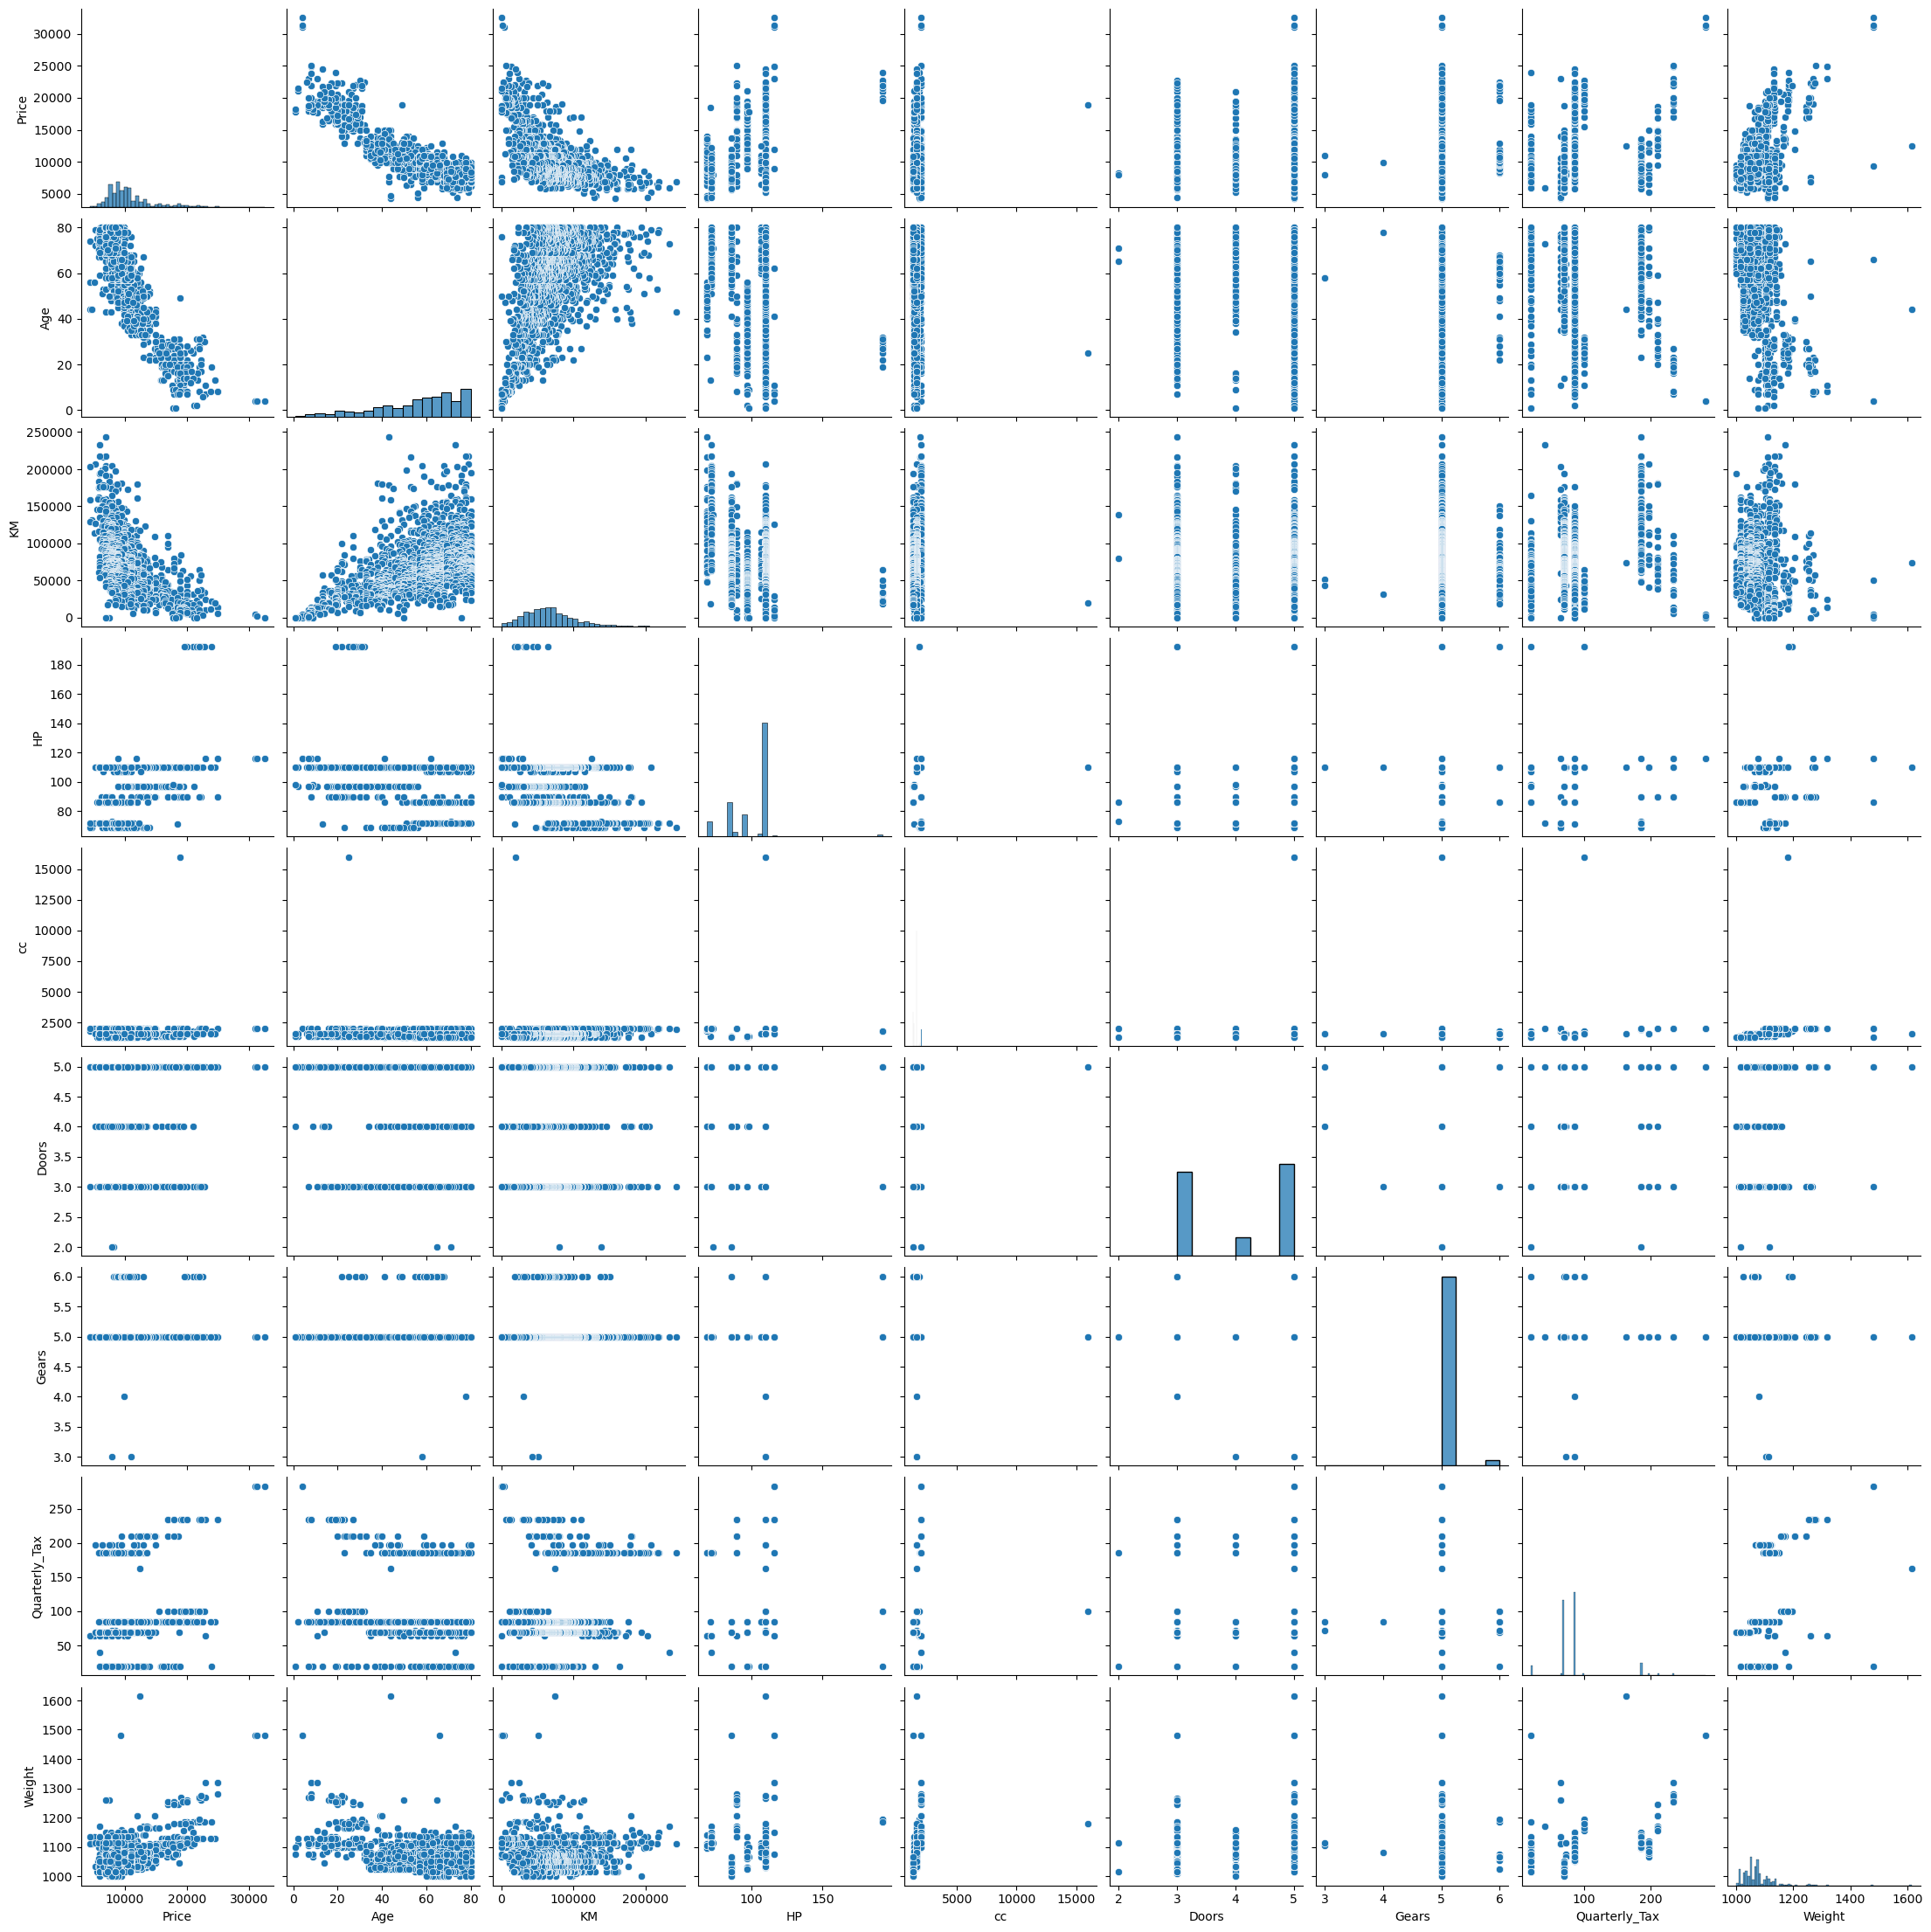

In [11]:
sns.pairplot(Toyota)

<AxesSubplot:>

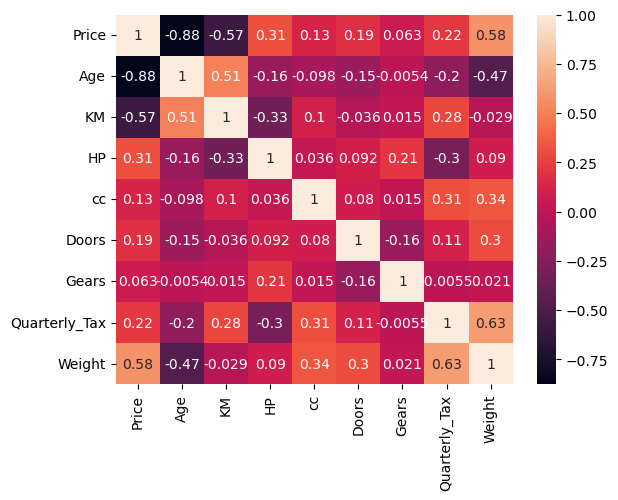

In [12]:
sns.heatmap(Toyota.corr(),annot =True)

# Model Building

In [13]:
import statsmodels.formula.api as smf

In [14]:
model = smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=Toyota).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Thu, 06 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:34:22   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age            -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Finding Variance Inflation Factor(VIF)

In [15]:
x = Toyota[["Age","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
y = Toyota[['Price']]

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [17]:
vif = pd.DataFrame()

In [18]:
vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]

In [19]:
vif['feature'] = x.columns

In [20]:
vif.round(1)

,VIF Factor,feature
0,16.4,Age
1,7.6,KM
2,64.9,HP
3,17.2,cc
4,21.9,Doors
5,438.6,Gears
6,11.0,Quarterly_Tax
7,543.1,Weight


# Model Subset

In [21]:
model1 = smf.ols("Price~Age+KM+HP+cc+Doors+Quarterly_Tax+Weight",data=Toyota).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1284.
Date:                Thu, 06 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:34:29   Log-Likelihood:                -12380.
No. Observations:                1436   AIC:                         2.478e+04
Df Residuals:                    1428   BIC:                         2.482e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2750.5553   1059.491     -2.596      0.010   -4828.881    -672.229
Age            -121.7928      2.623    -46.439      0.000    -126.937    -116.648
KM               -0.0205      0.001    -16.395      0.000      -0.023      -0.018
HP               33.7306      2.743     12.297      0.000      28.350      39.111
cc               -0.1251      0.090     -1.385      0.166      -0.302       0.052
Doors           -24.5339     39.389     -0.623      0.533    -101.799      52.732
Quarterly_Tax     4.1227      1.312      3.141      0.002       1.548       6.697
Weight           16.9852      1.071     15.860      0.000      14.884      19.086
==============================================================================
Omnibus:                      151.778   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              992.853
Skew:                          -0.231   Prob(JB):                    2.54e-216
Kurtosis:                       7.047   Cond. No.                     2.33e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
model2 = smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax",data=Toyota).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     1069.
Date:                Thu, 06 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:34:30   Log-Likelihood:                -12492.
No. Observations:                1436   AIC:                         2.500e+04
Df Residuals:                    1428   BIC:                         2.504e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      9980.6587   1101.951      9.057      0.000    7819.042    1.21e+04
Age            -136.3855      2.652    -51.426      0.000    -141.588    -131.183
KM               -0.0201      0.001    -14.793      0.000      -0.023      -0.017
HP               43.5743      2.946     14.790      0.000      37.795      49.354
cc                0.1066      0.096      1.106      0.269      -0.083       0.296
Doors           157.9483     41.991      3.762      0.000      75.578     240.318
Gears           620.1432    213.676      2.902      0.004     200.990    1039.296
Quarterly_Tax    16.1981      1.148     14.108      0.000      13.946      18.450
==============================================================================
Omnibus:                      211.411   Durbin-Watson:                   1.371
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              765.784
Skew:                           0.690   Prob(JB):                    5.15e-167
Kurtosis:                       6.301   Cond. No.                     2.28e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
model3 = smf.ols("Price~Age+KM+HP+cc+Doors+Quarterly_Tax",data=Toyota).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1239.
Date:                Thu, 06 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:34:31   Log-Likelihood:                -12497.
No. Observations:                1436   AIC:                         2.501e+04
Df Residuals:                    1429   BIC:                         2.504e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.295e+04    409.080     31.660      0.000    1.21e+04    1.38e+04
Age            -136.5498      2.658    -51.366      0.000    -141.765    -131.335
KM               -0.0198      0.001    -14.578      0.000      -0.022      -0.017
HP               45.7327      2.858     16.000      0.000      40.126      51.339
cc                0.1028      0.097      1.063      0.288      -0.087       0.292
Doors           134.2946     41.299      3.252      0.001      53.281     215.308
Quarterly_Tax    16.3993      1.149     14.272      0.000      14.145      18.653
==============================================================================
Omnibus:                      202.288   Durbin-Watson:                   1.378
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              717.719
Skew:                           0.665   Prob(JB):                    1.41e-156
Kurtosis:                       6.198   Cond. No.                     8.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
model4 = smf.ols("Price~Age+KM+HP+cc+Quarterly_Tax+Weight",data=Toyota).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1498.
Date:                Thu, 06 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:34:31   Log-Likelihood:                -12380.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1429   BIC:                         2.481e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2669.4843   1051.241     -2.539      0.011   -4731.625    -607.344
Age            -121.7929      2.622    -46.449      0.000    -126.937    -116.649
KM               -0.0205      0.001    -16.411      0.000      -0.023      -0.018
HP               33.6858      2.741     12.288      0.000      28.308      39.063
cc               -0.1244      0.090     -1.377      0.169      -0.302       0.053
Quarterly_Tax     4.1922      1.307      3.207      0.001       1.628       6.757
Weight           16.8156      1.036     16.239      0.000      14.784      18.847
==============================================================================
Omnibus:                      148.179   Durbin-Watson:                   1.548
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              952.170
Skew:                          -0.220   Prob(JB):                    1.73e-207
Kurtosis:                       6.965   Cond. No.                     2.31e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
# Q-Q plot

In [26]:
import statsmodels.api as sm

In [27]:
model4.resid

0      -3317.422641
1      -2534.232763
2      -2854.009977
3      -1481.210143
4      -2473.303708
           ...     
1431   -1265.258578
1432    2581.553403
1433      73.997148
1434   -1299.850398
1435   -3442.906500
Length: 1436, dtype: float64

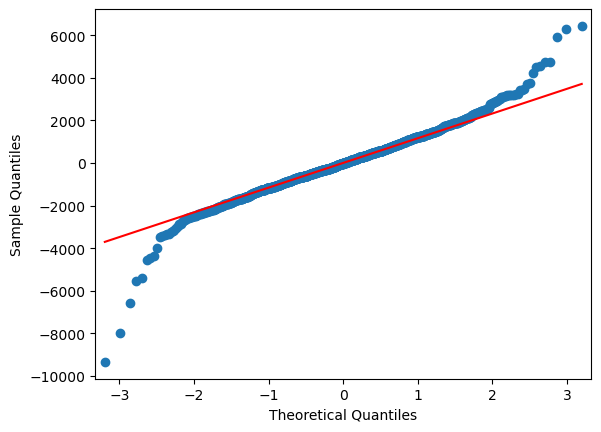

In [28]:
sm.qqplot(model4.resid,line='q');

In [30]:
np.where(model4.resid>10)

(array([   6,    7,    8,   10,   13,   14,   15,   16,   17,   18,   19,
          20,   21,   22,   23,   24,   26,   27,   28,   29,   32,   35,
          36,   38,   41,   43,   45,   46,   47,   49,   51,   52,   53,
          56,   58,   59,   61,   62,   63,   64,   65,   66,   68,   69,
          70,   72,   74,   75,   76,   77,   78,   80,   81,   83,   84,
          85,   88,   89,   90,   91,   92,   94,   95,   98,   99,  100,
         102,  103,  104,  105,  106,  107,  108,  109,  110,  111,  112,
         113,  114,  115,  116,  118,  119,  120,  121,  123,  125,  126,
         127,  128,  134,  136,  138,  139,  141,  142,  143,  144,  146,
         147,  148,  149,  150,  151,  152,  153,  154,  156,  157,  158,
         159,  160,  161,  162,  163,  165,  166,  167,  168,  169,  170,
         171,  172,  173,  174,  175,  176,  177,  178,  179,  180,  181,
         182,  183,  190,  194,  196,  197,  201,  204,  210,  211,  216,
         223,  230,  232,  233,  237, 

# 2. Residual plot of Homoscedasticity
- Homoscedasticity can be checked by plotting a scatter plot between fitted values and residuals.

Text(0, 0.5, 'Residuals')

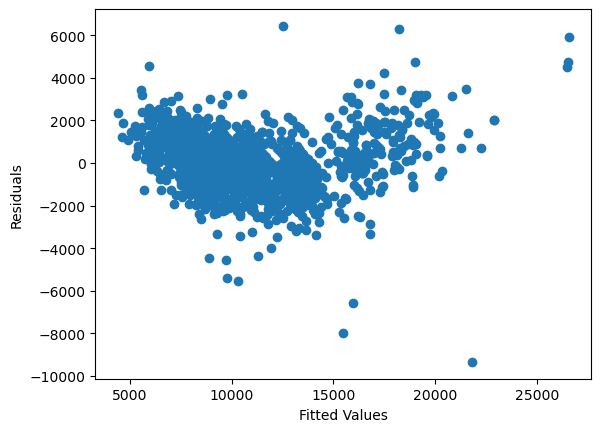

In [31]:
plt.scatter(model4.fittedvalues,model4.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

# 3.Residual VS Regressor

eval_env: 1


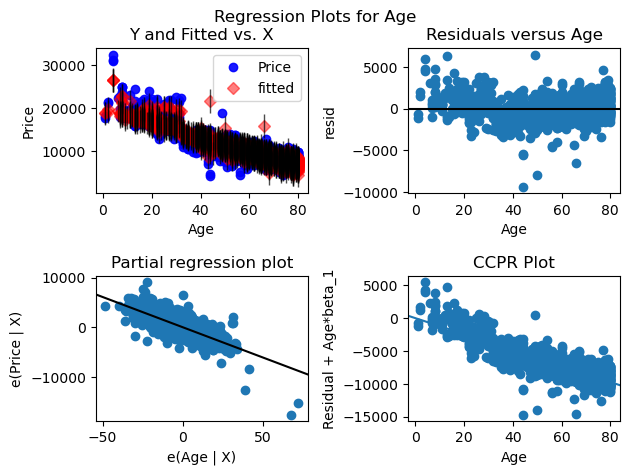

In [32]:
sm.graphics.plot_regress_exog(model4,'Age');

eval_env: 1


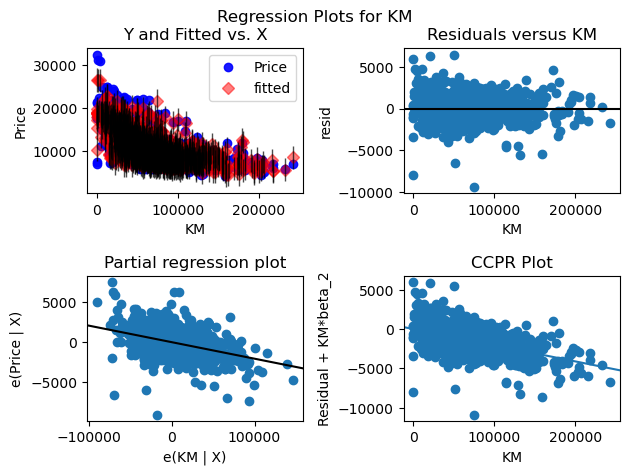

In [33]:
sm.graphics.plot_regress_exog(model4,'KM');

eval_env: 1


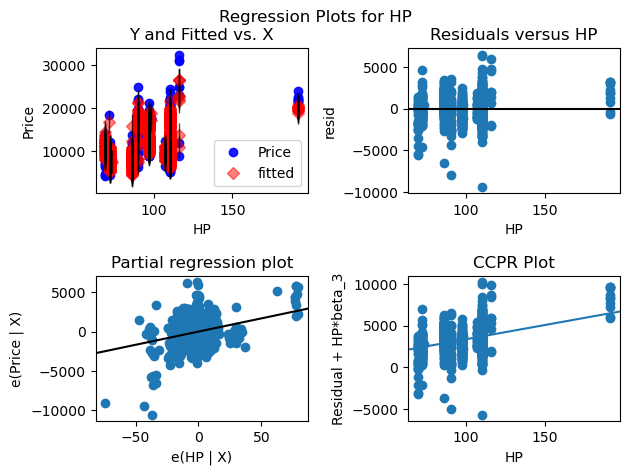

In [34]:
sm.graphics.plot_regress_exog(model4,'HP');

eval_env: 1


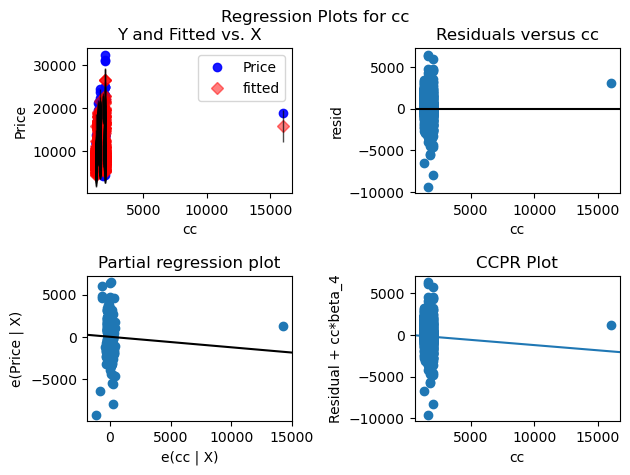

In [35]:
sm.graphics.plot_regress_exog(model4,'cc');

eval_env: 1


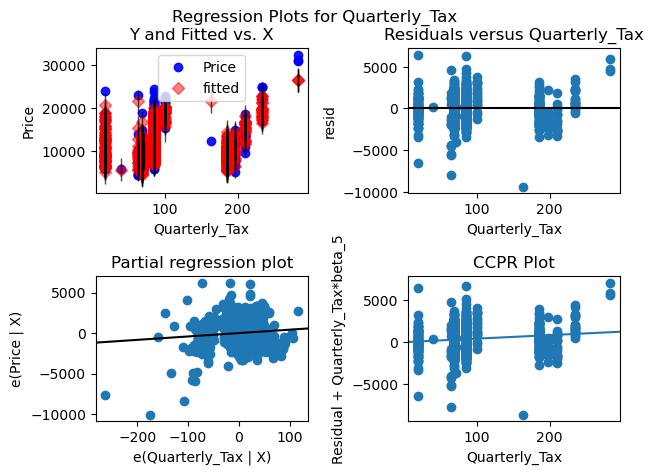

In [36]:
sm.graphics.plot_regress_exog(model4,'Quarterly_Tax');

eval_env: 1


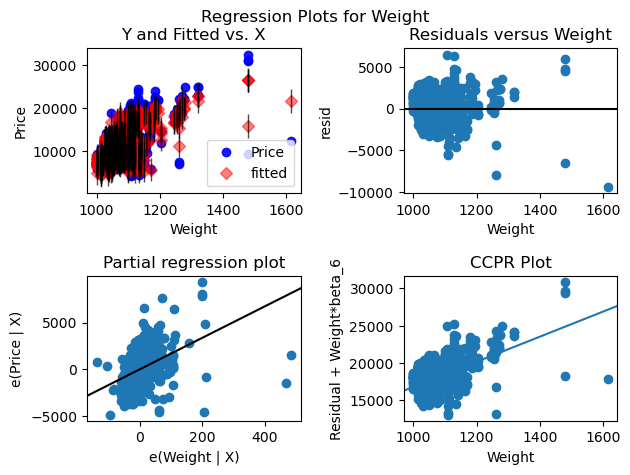

In [37]:
sm.graphics.plot_regress_exog(model4,'Weight');

# Model Deletion Techiniques

# finding Cook's Distance

In [38]:
inf = model4.get_influence()
c,p = inf.cooks_distance
c

array([7.94634117e-03, 4.31088094e-03, 6.02396204e-03, ...,
       2.67194643e-06, 8.05624057e-04, 1.35714526e-02])

<StemContainer object of 3 artists>

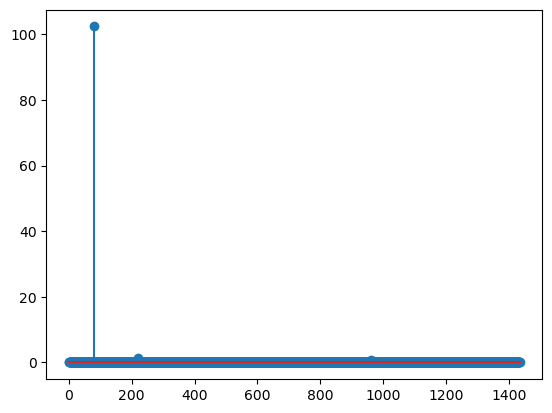

In [39]:
# cook's Distance plot
plt.stem(range(len(Toyota)),c)

In [40]:
np.argmax(c),np.max(c)

(80, 102.42006677713853)

In [41]:
# Calculate cutoff

k = len(Toyota.columns)
n = len(Toyota)

cut_off = 3*(k+1)/n
cut_off

0.020891364902506964

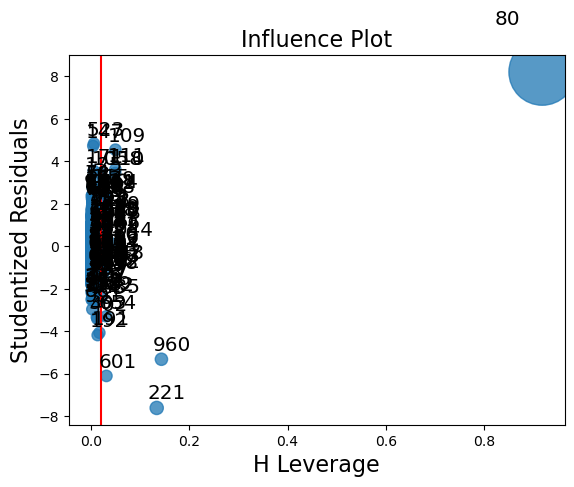

In [42]:
#Influence Plot
from statsmodels.graphics.regressionplots import influence_plot

influence_plot(model4);
plt.axvline(cut_off,color = 'r')

In [43]:
# Improving the model

In [44]:
Toyota.drop(80,axis=0,inplace =True)

C:\Users\abc\AppData\Local\Temp\ipykernel_9868\4082836101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Toyota.drop(80,axis=0,inplace =True)


In [45]:
Toyota.reset_index(inplace=True)

In [46]:
model = smf.ols("Price~Age+KM+HP+cc+Quarterly_Tax+Weight",data=Toyota).fit()

inf = model.get_influence()
c,p = inf.cooks_distance

<StemContainer object of 3 artists>

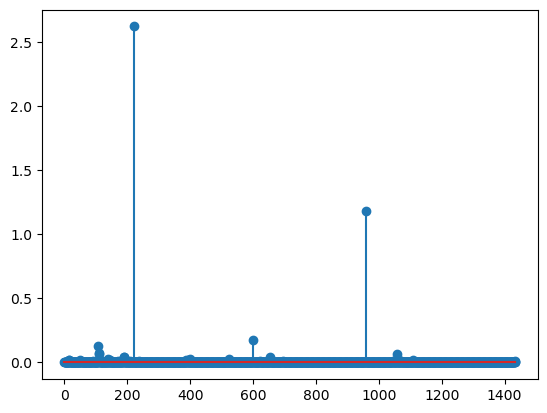

In [47]:
plt.stem(range(len(Toyota)),c)

In [48]:
np.argmax(c),np.max(c)

(220, 2.621241661872383)

In [49]:
Toyota.drop(220,axis=0,inplace =True)

C:\Users\abc\AppData\Local\Temp\ipykernel_9868\163470699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Toyota.drop(220,axis=0,inplace =True)


In [50]:
Toyota.reset_index(inplace=True)

In [51]:
Toyota.drop(958,axis=0,inplace =True)

C:\Users\abc\AppData\Local\Temp\ipykernel_9868\1023919862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Toyota.drop(958,axis=0,inplace =True)


In [52]:
Toyota.drop(columns=['index','level_0'], inplace=True)

C:\Users\abc\AppData\Local\Temp\ipykernel_9868\2185834723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Toyota.drop(columns=['index','level_0'], inplace=True)


In [53]:
model = smf.ols("Price~Age+KM+HP+cc+Quarterly_Tax+Weight",data=Toyota).fit()

inf = model.get_influence()
c,p = inf.cooks_distance

<StemContainer object of 3 artists>

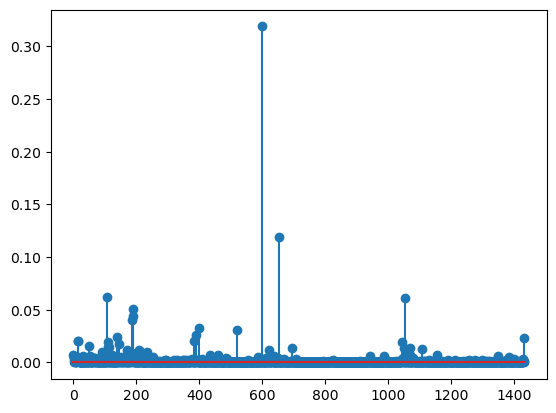

In [54]:
plt.stem(range(len(Toyota)),c)

- Since the value is <1 , we can stop the diagnostic process and finalize the model

# Final Model

In [56]:
final_model = smf.ols('Price~Age+KM+HP+cc+Quarterly_Tax+Weight',data=Toyota).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1802.
Date:                Thu, 06 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:36:18   Log-Likelihood:                -12237.
No. Observations:                1433   AIC:                         2.449e+04
Df Residuals:                    1426   BIC:                         2.452e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.166e+04   1143.129    -10.198      0.000   -1.39e+04   -9415.501
Age            -112.5472      2.493    -45.152      0.000    -117.437    -107.658
KM               -0.0169      0.001    -14.075      0.000      -0.019      -0.015
HP               38.0041      2.682     14.169      0.000      32.743      43.265
cc               -3.6933      0.301    -12.251      0.000      -4.285      -3.102
Quarterly_Tax     5.8442      1.374      4.254      0.000       3.149       8.539
Weight           29.1712      1.231     23.701      0.000      26.757      31.586
==============================================================================
Omnibus:                      108.252   Durbin-Watson:                   1.699
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              548.072
Skew:                          -0.073   Prob(JB):                    9.72e-120
Kurtosis:                       6.026   Cond. No.                     2.73e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Predicting for new Records

In [57]:
Toyota

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [58]:
newdf = pd.DataFrame({
    'Age':[25],
    'KM':[41711],
    'HP':[100],
    'cc':[2300],
    'Quarterly_Tax':[210],
    'Weight':[1170]
    
})
newdf

,Age,KM,HP,cc,Quarterly_Tax,Weight
0,25,41711,100,2300,210,1170


In [59]:
final_model.predict(newdf)

0    15485.848676
dtype: float64